In [1]:
# Libraries
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt

from sklearn.metrics         import mean_squared_error
from sklearn.tree            import DecisionTreeRegressor
from sklearn.preprocessing   import StandardScaler
from sklearn.utils           import resample
from sklearn.ensemble        import AdaBoostRegressor

In [2]:
# local file paths

dir_name = 'selezione'
region_names = np.array(['A', 'B', 'C'])

fp_Xtrain = []
fp_Xval   = []
fp_Xtest  = []
fp_ytrain = []
fp_yval   = []
fp_ytest  = []

for i in range(3):
    fp_Xtrain.append(dir_name + f'/X_train{region_names[i]}.csv')
    fp_Xval  .append(dir_name + f'/X_val{  region_names[i]}.csv')
    fp_Xtest .append(dir_name + f'/X_test{ region_names[i]}.csv')
    fp_ytrain.append(dir_name + f'/y_train{region_names[i]}.csv')
    fp_yval  .append(dir_name + f'/y_val{  region_names[i]}.csv')
    fp_ytest .append(dir_name + f'/y_test{ region_names[i]}.csv')

In [3]:
# Lettura dei dati

X_train = []
X_val   = []
X_test  = []
y_train = []
y_val   = []
y_test  = []

for i in range(3):
    X_train.append(pd.read_csv(fp_Xtrain[i], low_memory=False))
    X_val  .append(pd.read_csv(fp_Xval  [i], low_memory=False))        
    X_test .append(pd.read_csv(fp_Xtest [i], low_memory=False))
    y_train.append(pd.read_csv(fp_ytrain[i], low_memory=False))
    y_val  .append(pd.read_csv(fp_yval  [i], low_memory=False))        
    y_test .append(pd.read_csv(fp_ytest [i], low_memory=False))
    
X_train = np.array(X_train, dtype=object)
X_val   = np.array(X_val,   dtype=object)
X_test  = np.array(X_test,  dtype=object)
y_train = np.array(y_train, dtype=object)
y_val   = np.array(y_val,   dtype=object)
y_test  = np.array(y_test,  dtype=object)

In [4]:
def dimensionality(y=False):
    for i in range(3):
        print(f'X_train{region_names[i]}: {X_train[i].shape}')
        print(f'X_val{region_names[i]}:   {X_val  [i].shape}')
        print(f'X_test{region_names[i]}:  {X_test [i].shape}')
        if y:
            print(f'y_train{region_names[i]}: {y_train[i].shape}')
            print(f'y_val{region_names[i]}:   {y_val  [i].shape}')
            print(f'y_test{region_names[i]}:  {y_test [i].shape}')
        print()

In [5]:
dimensionality(y=True)

X_trainA: (26819, 41)
X_valA:   (9006, 41)
X_testA:  (9085, 41)
y_trainA: (26819, 1)
y_valA:   (9006, 1)
y_testA:  (9085, 1)

X_trainB: (8119, 34)
X_valB:   (2658, 34)
X_testB:  (2606, 34)
y_trainB: (8119, 1)
y_valB:   (2658, 1)
y_testB:  (2606, 1)

X_trainC: (64771, 48)
X_valC:   (21908, 48)
X_testC:  (21876, 48)
y_trainC: (64771, 1)
y_valC:   (21908, 1)
y_testC:  (21876, 1)



Per limiti tecnici di memoria, la gestione del dataset C risulta complicata e incorre spesso in errori a run-time di cateoria __MemoryError__

Le macchine su cui sono eseguiti i notebook supportano operazioni su circa 30000 righe, quindi uso i 2/5 del dataset originale per la Regione C

In [6]:
perc = 2/5
ind  = 2
for X, y in zip([X_train, X_val, X_test], [y_train, y_val, y_test]):
    X[ind], y[ind] = resample(
        X[ind], y[ind],
        n_samples = int(perc * len(X[2]))
    )

In [7]:
dimensionality(y=True)

X_trainA: (26819, 41)
X_valA:   (9006, 41)
X_testA:  (9085, 41)
y_trainA: (26819, 1)
y_valA:   (9006, 1)
y_testA:  (9085, 1)

X_trainB: (8119, 34)
X_valB:   (2658, 34)
X_testB:  (2606, 34)
y_trainB: (8119, 1)
y_valB:   (2658, 1)
y_testB:  (2606, 1)

X_trainC: (25908, 48)
X_valC:   (8763, 48)
X_testC:  (8750, 48)
y_trainC: (25908, 1)
y_valC:   (8763, 1)
y_testC:  (8750, 1)



# Costruzione DecisionTreeRegressor #

In [8]:
plt.rcParams.update({'font.size': 35})

In [9]:
def get_bias_var_mse(X, y, model):
        y_pred = model.predict(X)
        return {
            'bias': ((y - np.mean(y_pred))**2).mean(),\
            'var':  np.var(y_pred).mean(),\
            'mse':  ((y_pred - y.reshape(-1,1))**2).mean()
        }

In [10]:
# Costruzione Decision TreeRegressor
def DecisionTreeRegressor_validation(X_train, y_train, X_val, y_val, verbose=False, debug=False, file_name=''):
    
    def get_dec_tree_reg(max_leaf):
        dt = DecisionTreeRegressor(max_leaf_nodes=max_leaf)
        dt.fit(X_train,y_train)
        return dt
    
    def bias_var_mse(X, y, model):
        stats = get_bias_var_mse(X, y, model)
        return stats['bias'],\
               stats['var'],\
               stats['mse']
    
    def plot_mse(stats, name):
    
        print (f'TUNING DEL MASSIMO NUMERO DI FOGLIE {name}')
        print()
    
        for n in ['mse', 'bias', 'var']:
        
            min_  = min(stats[n])
            best  = np.argmin(stats[n]) + start
            
            print (f'Punteggio finale: {stats[n][-1]} ({end}) stimatori')
            print (f'Best {n}: {min_}')
            print (f'Best number of Estimators: {best}')
            print()

        fig, ax = plt.subplots(figsize=(len(stats['mse'])/2, 10))
        
        ax.tick_params(axis='both', which='major', labelsize=25)
        ax.tick_params(axis='both', which='minor', labelsize=15)
        
        ax.plot(range(start, end+1),  stats['mse' ], 'o-', label='MSE')
        ax.plot(range(start, end+1),  stats['bias'], 'o-', label='BIAS')
        ax.plot(range(start, end+1),  stats['var' ], 'o-', label='VARIANCE')
        
        ax.set_title(f"{name} MSE, BIAS, VARIANCE on differe Estimators", fontsize=15)
        ax.set_xlabel("Number of Max Estimators used", fontsize=15)
        ax.grid()
        ax.legend(prop={'size': 12})
        
        if file_name != '':
            fig.savefig('images/' + file_name + '_' + name + '_DTR.jpg')
        
    y_train = y_train.values.ravel()
    y_val   = y_val  .values.ravel()

    start =   2
    end   =  100
    
    model_start = get_dec_tree_reg(start)
    
    _, _, best_mse = bias_var_mse(X_train, y_train, model_start)
    
    best_max_leaf = start
    best_model      = model_start
    
    info         = []
    
    train_stats  = {
        'bias' : [],
        'var'  : [],
        'mse'  : []
    }
    
    val_stats    = {
        'bias' : [],
        'var'  : [],
        'mse'  : []
    } 
    
    for max_leaf in range(start, end+1):
        
        if debug:
            print(f'{max_leaf}/{end}')
    
        model = get_dec_tree_reg(max_leaf)
        
        trn_bias, trn_var, trn_mse = bias_var_mse(X_train, y_train, model)
        val_bias, val_var, val_mse = bias_var_mse(  X_val,   y_val, model)

        train_stats['bias'].append(trn_bias)
        train_stats['var' ].append(trn_var )
        train_stats['mse' ].append(trn_mse )
        
        val_stats['bias'].append(val_bias)
        val_stats['var' ].append(val_var )
        val_stats['mse' ].append(val_mse )
        
        info.append(f'Max Leaf: {max_leaf}' +\
                    f'\n(Train MSE:       {trn_mse }  - Val MSE:      {val_mse })' +\
                    f'\n(Train Bias:      {trn_bias}  - Val Bias:     {val_bias})' +\
                    f'\n(Train Variance:  {trn_var }  - Val Variance: {val_var })' )

        if(val_mse < best_mse):
            best_mse = val_mse
            best_max_leaf = max_leaf
            best_model = model
    
    if verbose:
        print()
        print("MSE, BIAS, VARIANCE Train e Validation")
        print(*info, sep='\n')
        print()
        
    plot_mse(train_stats, "TRAIN"     )
    plot_mse(  val_stats, "VALIDATION")
                
    return best_model

In [11]:
#sub_perc = [   1/3,     1,    1/4] # circa 8000
#sub_perc = [     1,     1,    2/5] # A e B uguali, C circa 30000
sub_perc = [1/1000, 1/100, 1/1000] # circa 100, per testing
#sub_perc = [     1,     1,      1] # dataset completo

In [12]:
for i in range(3):
    print(int(len(X_train[i])*sub_perc[i]))
    print(int(len(X_val  [i])*sub_perc[i]))
    print()

26
9

81
26

25
8



In [13]:
X_train_sub = []
y_train_sub = []
X_val_sub = []
y_val_sub = []

In [14]:
for i in range(3):
    Xt_sub, yt_sub = resample(X_train[i], y_train[i], n_samples = int(sub_perc[i]*len(X_train[i])))
    Xv_sub, yv_sub = resample(X_val  [i], y_val  [i], n_samples = int(sub_perc[i]*len(X_val[i])))
    X_train_sub.append(Xt_sub)
    y_train_sub.append(yt_sub)
    X_val_sub  .append(Xv_sub)
    y_val_sub  .append(yv_sub)

In [15]:
dt_model = []

In [16]:
def get_dt(index, verbose=False, debug=False, file_name=''):
    return DecisionTreeRegressor_validation(
        X_train_sub[index],\
        y_train_sub[index],\
        X_val_sub  [index],\
        y_val_sub  [index],\
        verbose   = verbose,\
        debug     = debug,\
        file_name = file_name
    )

TUNING DEL MASSIMO NUMERO DI FOGLIE TRAIN

Punteggio finale: 0.0035497704652407295 (100) stimatori
Best mse: 0.0027285601068624344
Best number of Estimators: 2

Punteggio finale: 0.0017748852326203643 (100) stimatori
Best bias: 0.0017748852326203643
Best number of Estimators: 2

Punteggio finale: 0.0017748852326203643 (100) stimatori
Best var: 0.0009536748742420702
Best number of Estimators: 2

TUNING DEL MASSIMO NUMERO DI FOGLIE VALIDATION

Punteggio finale: 0.006923551184287326 (100) stimatori
Best mse: 0.006760373701291408
Best number of Estimators: 17

Punteggio finale: 0.0064146636565629266 (100) stimatori
Best bias: 0.006413707115760293
Best number of Estimators: 5

Punteggio finale: 0.0005088875277244005 (100) stimatori
Best var: 0.000285838450537951
Best number of Estimators: 17

CPU times: user 1.3 s, sys: 11.8 ms, total: 1.31 s
Wall time: 1.39 s


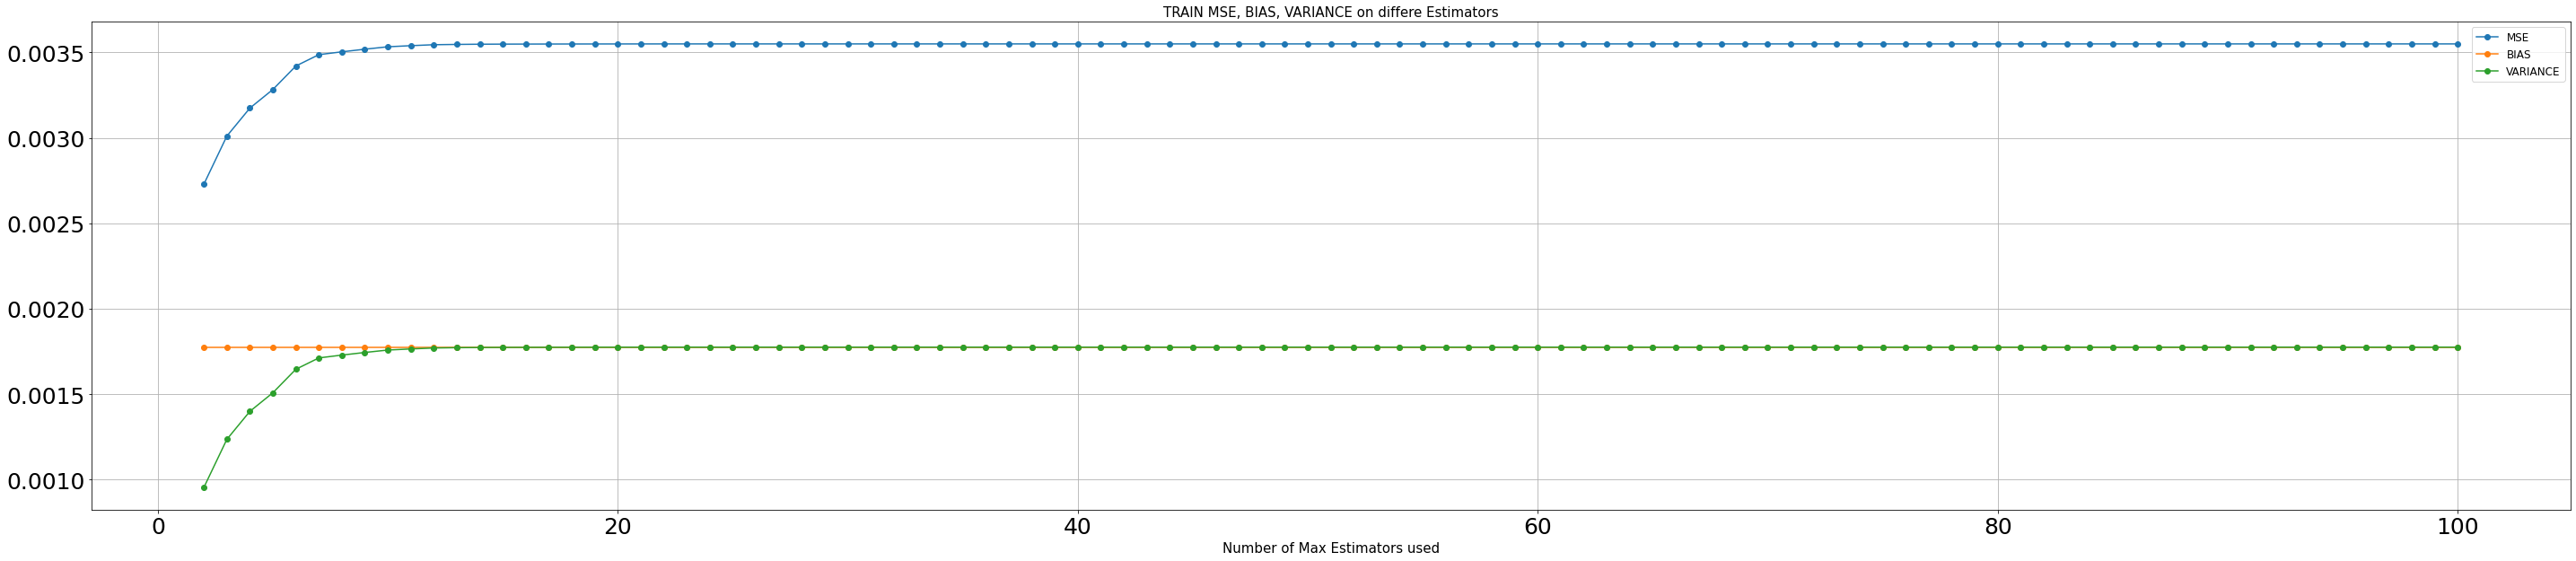

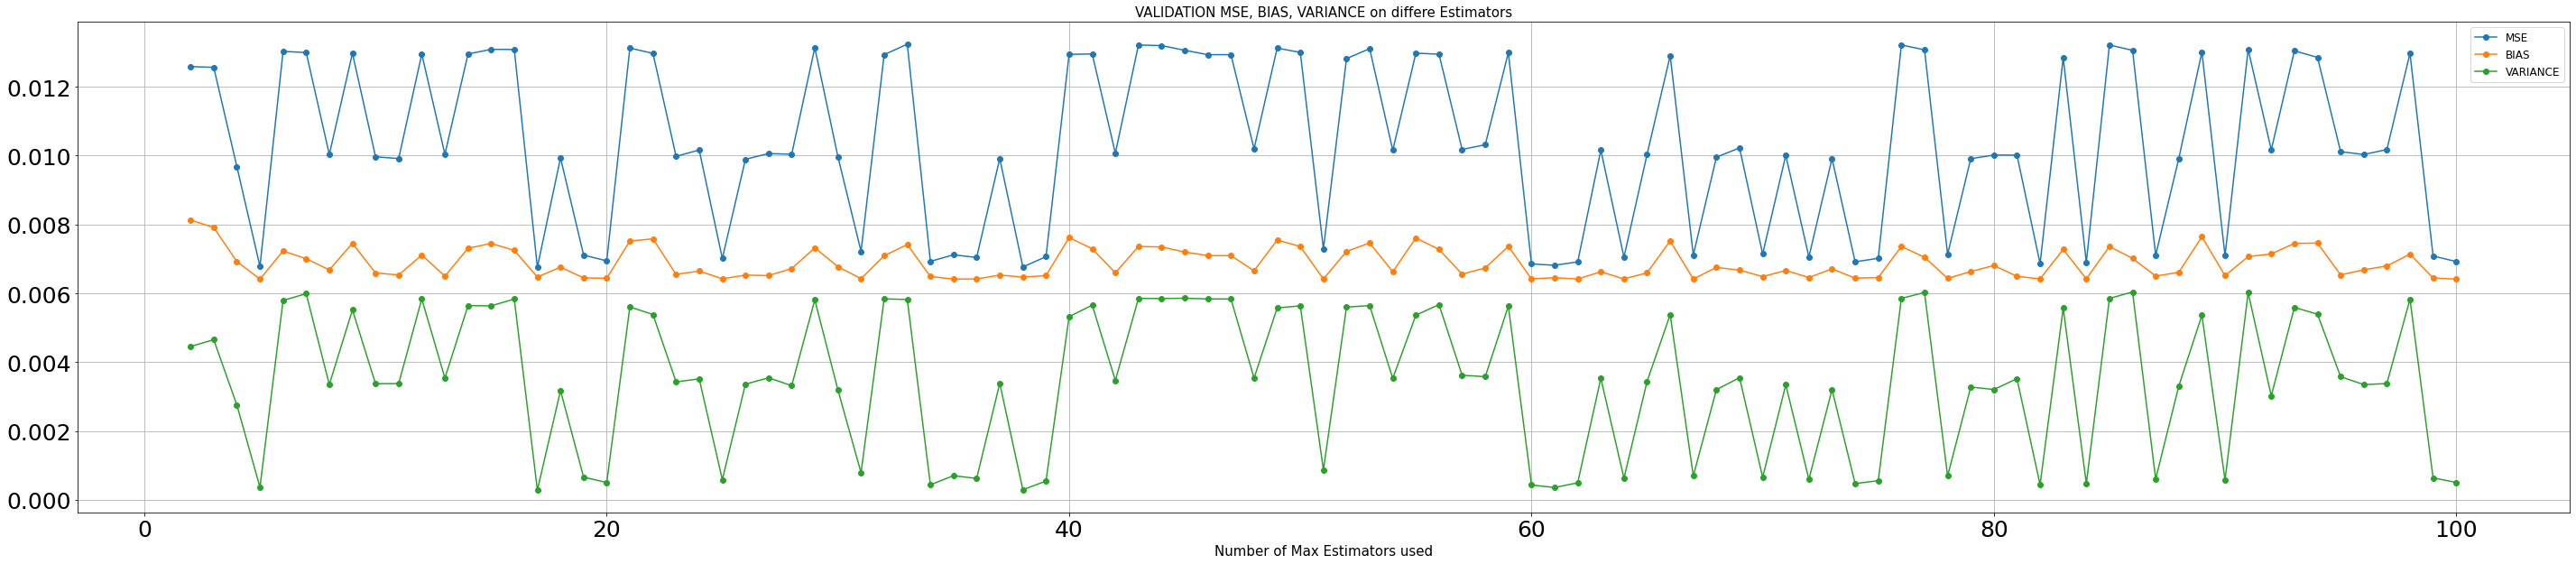

In [17]:
%%time
dt_model.append(
    get_dt(
        0,
        verbose   = False,
        debug     = False,
        file_name = 'A'
    )
)

TUNING DEL MASSIMO NUMERO DI FOGLIE TRAIN

Punteggio finale: 0.021260805409118934 (100) stimatori
Best mse: 0.01630066694679198
Best number of Estimators: 2

Punteggio finale: 0.010630402704559463 (100) stimatori
Best bias: 0.010630402704559463
Best number of Estimators: 3

Punteggio finale: 0.010630402704559463 (100) stimatori
Best var: 0.005670264242232516
Best number of Estimators: 2

TUNING DEL MASSIMO NUMERO DI FOGLIE VALIDATION

Punteggio finale: 0.007455805950377898 (100) stimatori
Best mse: 0.004098527478989354
Best number of Estimators: 3

Punteggio finale: 0.004155833806295147 (100) stimatori
Best bias: 0.004061030442372557
Best number of Estimators: 40

Punteggio finale: 0.0032999721440827513 (100) stimatori
Best var: 0.0
Best number of Estimators: 2

CPU times: user 1.3 s, sys: 17 ms, total: 1.31 s
Wall time: 1.32 s


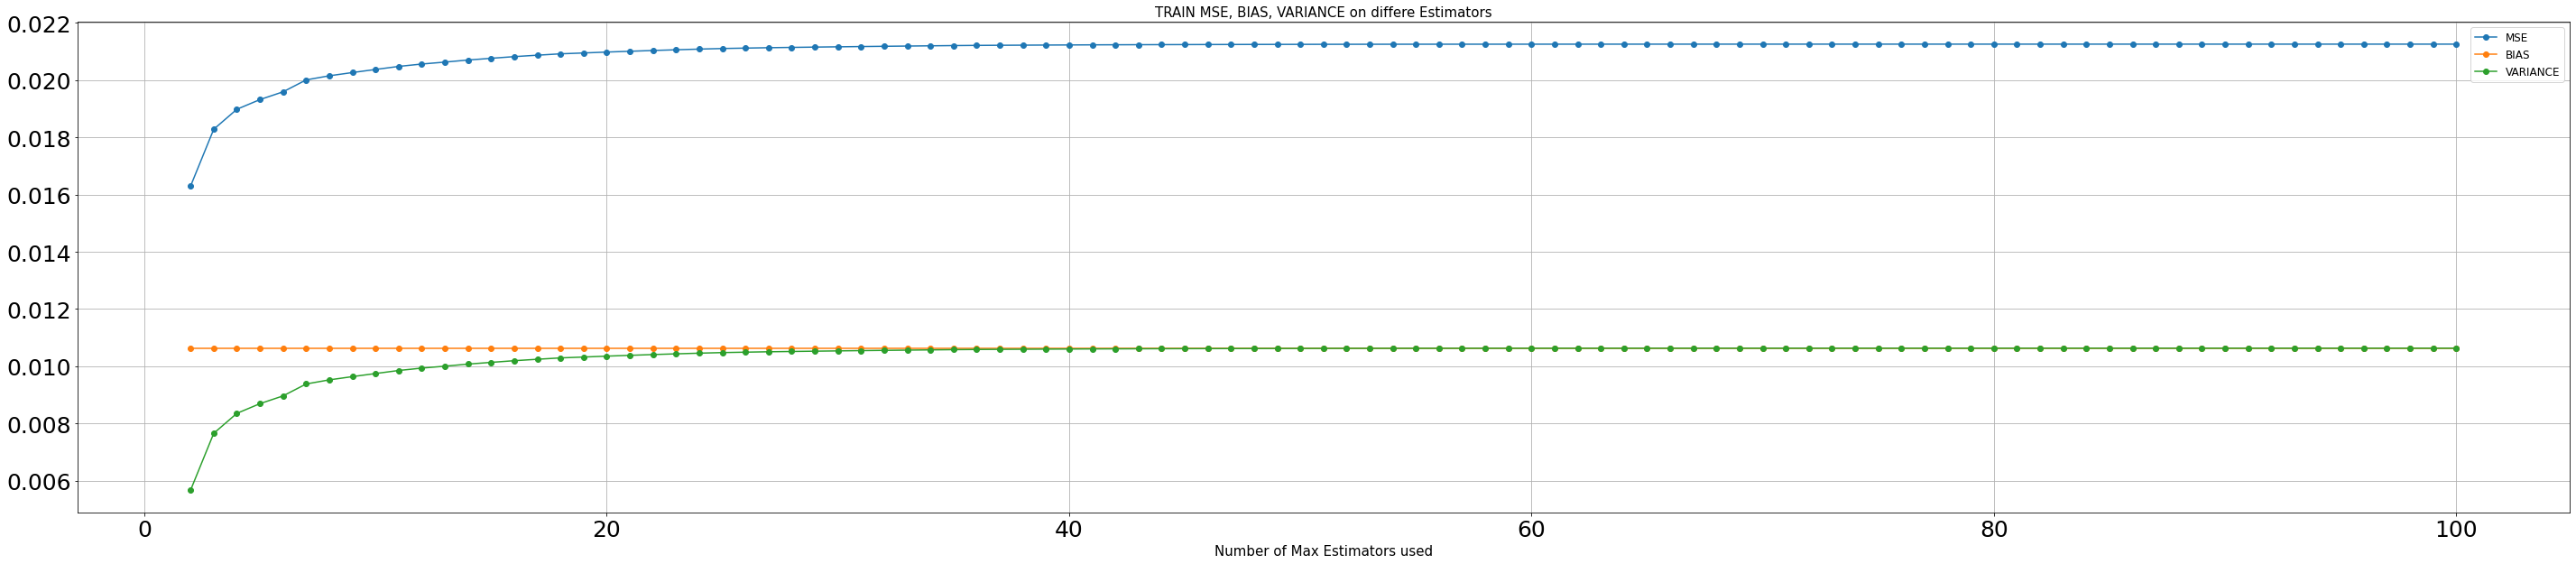

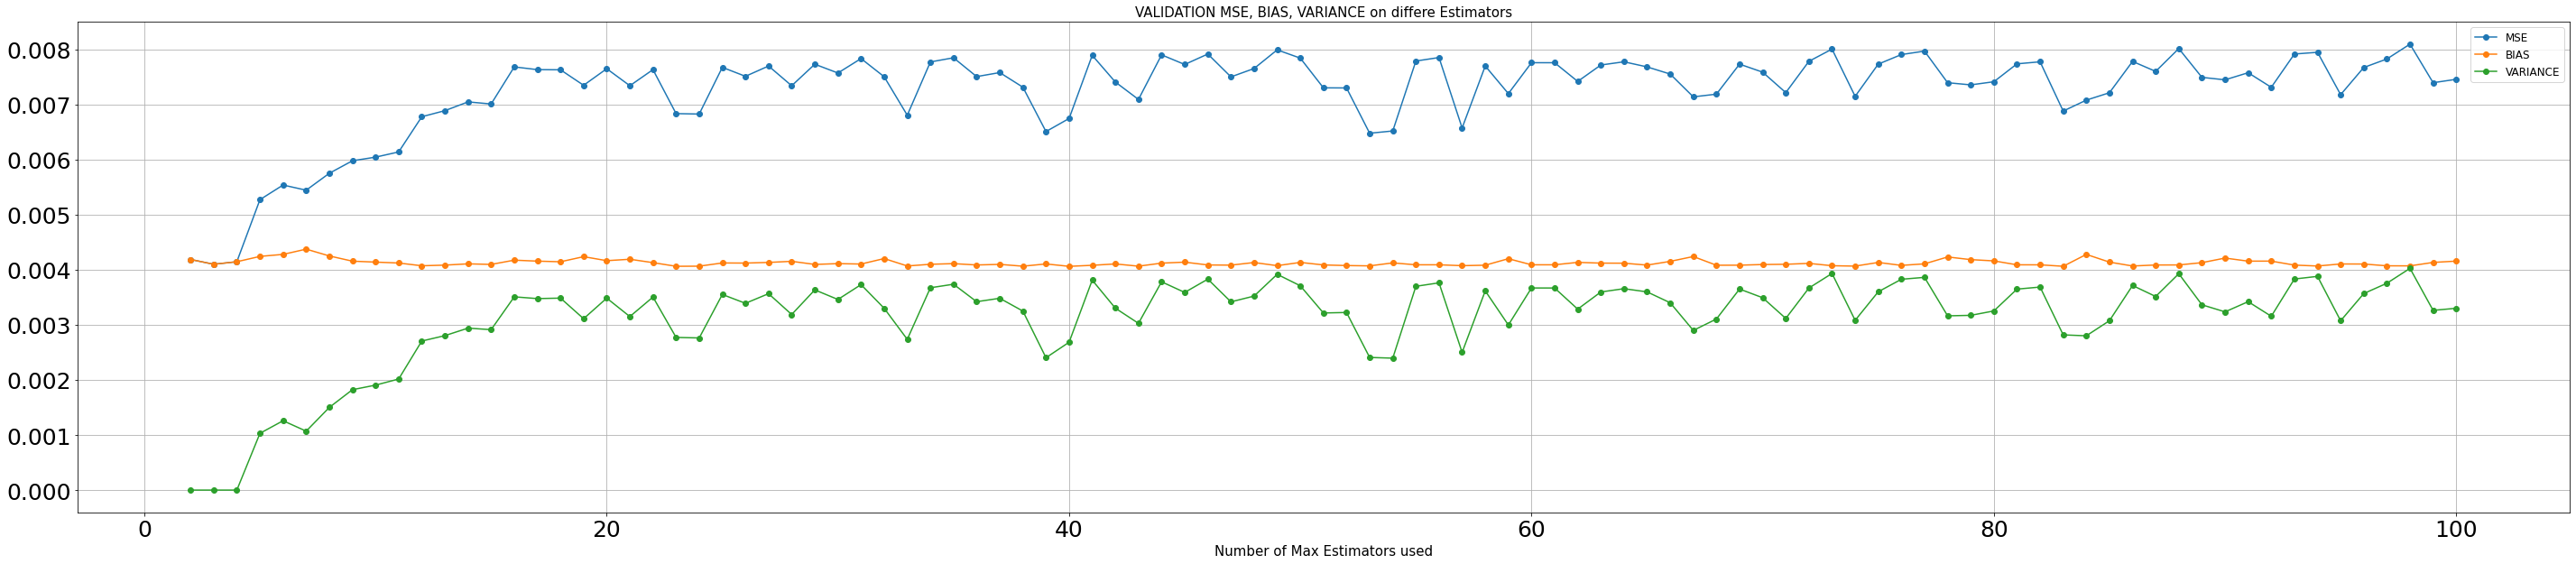

In [18]:
%%time
dt_model.append(
    get_dt(
        1,
        verbose   = False,
        debug     = False,
        file_name = 'B'
    )
)

TUNING DEL MASSIMO NUMERO DI FOGLIE TRAIN

Punteggio finale: 0.033448486507513614 (100) stimatori
Best mse: 0.025601658612255
Best number of Estimators: 2

Punteggio finale: 0.016724243253756807 (100) stimatori
Best bias: 0.016724243253756807
Best number of Estimators: 2

Punteggio finale: 0.016724243253756807 (100) stimatori
Best var: 0.008877415358498189
Best number of Estimators: 2

TUNING DEL MASSIMO NUMERO DI FOGLIE VALIDATION

Punteggio finale: 0.02966806893515442 (100) stimatori
Best mse: 0.025273617006546102
Best number of Estimators: 26

Punteggio finale: 0.016203815190404994 (100) stimatori
Best bias: 0.016043315553018016
Best number of Estimators: 10

Punteggio finale: 0.013464253744749428 (100) stimatori
Best var: 0.004935769133423569
Best number of Estimators: 61

CPU times: user 1.24 s, sys: 27.8 ms, total: 1.27 s
Wall time: 1.3 s


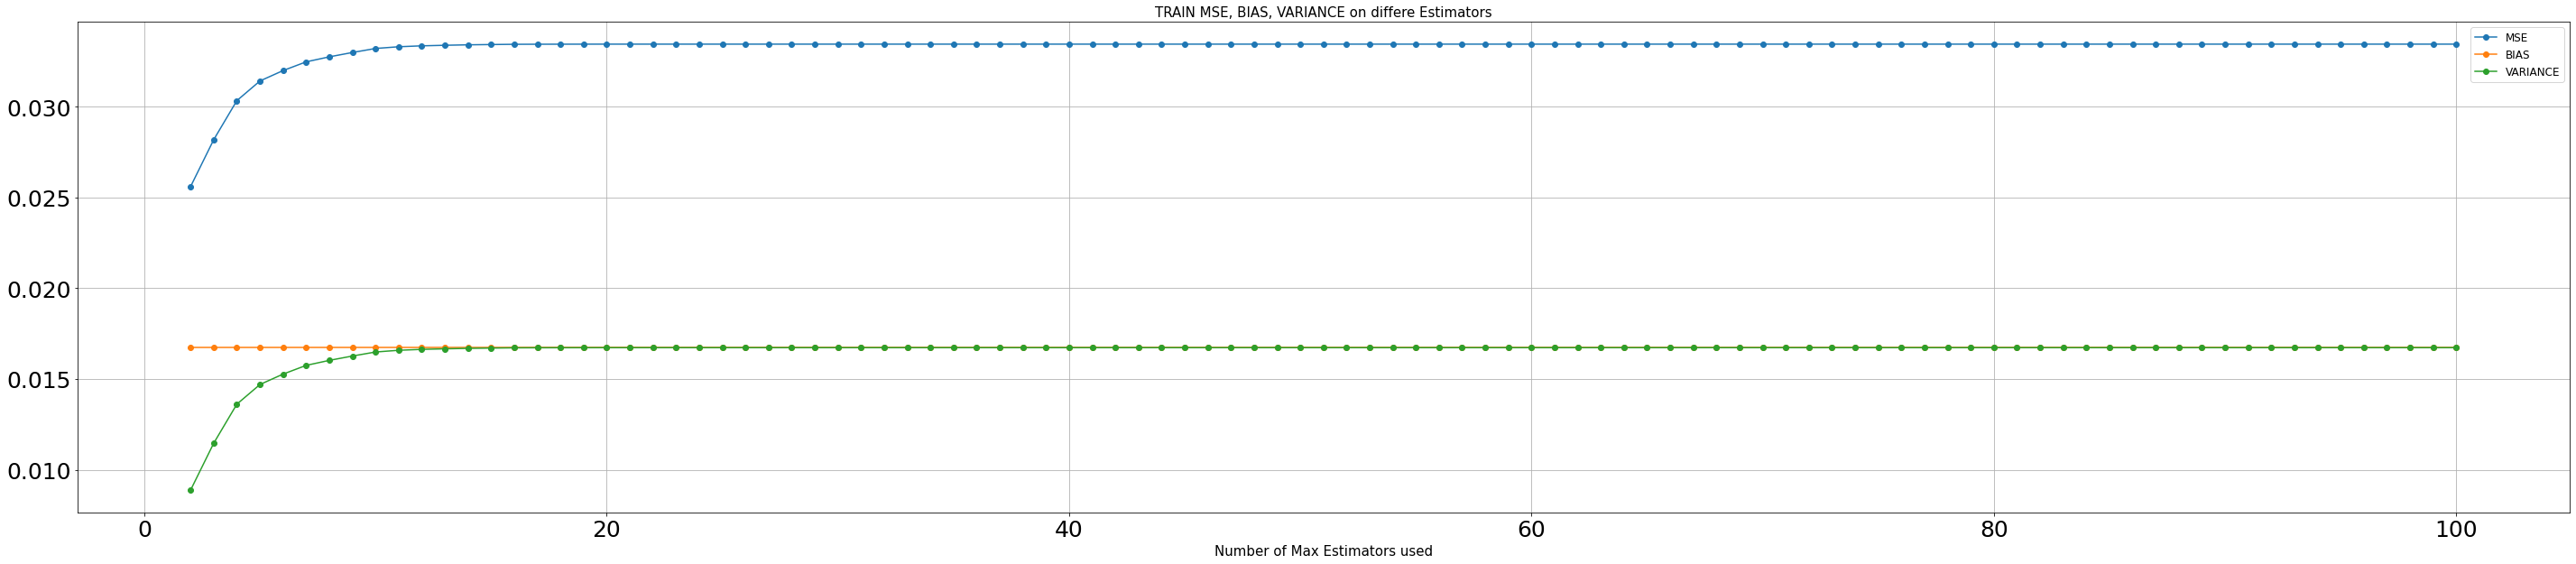

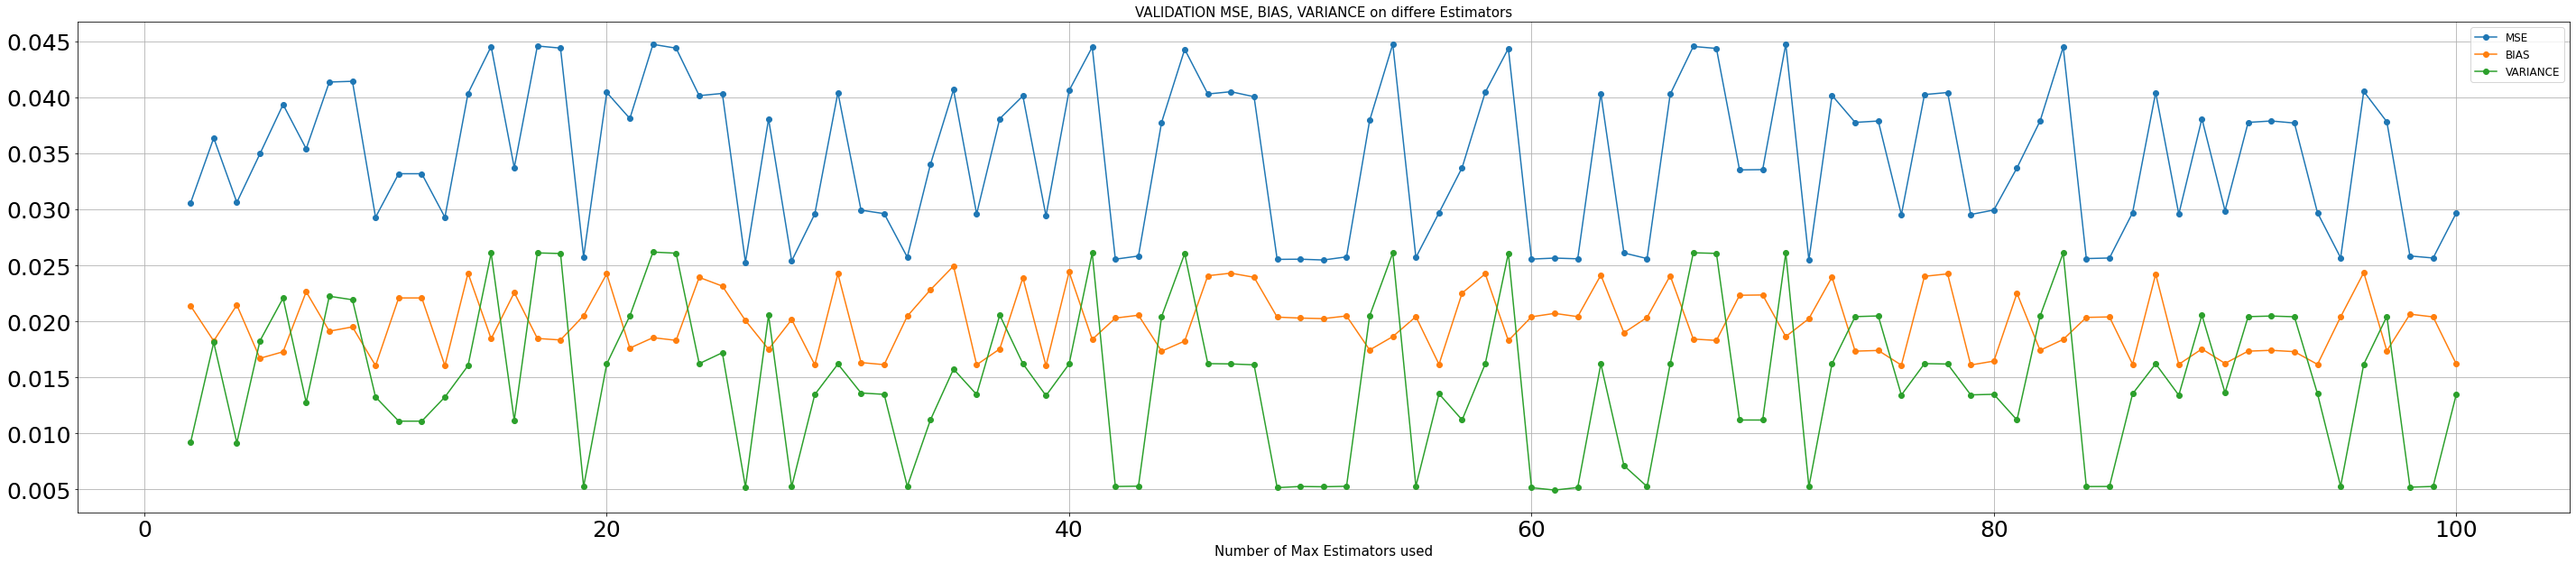

In [19]:
%%time
dt_model.append(
    get_dt(
        2,
        verbose   = False,
        debug     = False,
        file_name = 'C'
    )
)

In [20]:
dt_model

[DecisionTreeRegressor(max_leaf_nodes=2),
 DecisionTreeRegressor(max_leaf_nodes=3),
 DecisionTreeRegressor(max_leaf_nodes=26)]

In [37]:
def get_score(model, X, y):
    
    return mean_squared_error(y_true=y,   y_pred=model.predict(X))

In [41]:
def print_score(X, y, models):
    for i in range(3):
        print(f'{region_names[i]}: {get_score(models[i], X[i], y[i])}')
        print()

In [42]:
# Train
print_score(X_train, y_train, dt_model)

A: 0.008455863096042565

B: 0.015918853623553574

C: 0.019663366171298165



In [43]:
# Validation
print_score(X_val, y_val, dt_model)

A: 0.028828530550217026

B: 0.02558435909647721

C: 0.03463142383934715



In [44]:
# Test
print_score(X_test, y_test, dt_model)

A: 0.030470289163871227

B: 0.03079115356085899

C: 0.037532792964226354



Da dove proviene l'errore?

In [26]:
for i in range(3):
    print(region_names[i])
    print('Train     ', get_bias_var_mse(X_train[i], y_train[i].values.ravel(), dt_model[i]))
    print('Validation', get_bias_var_mse(X_val  [i], y_val  [i].values.ravel(), dt_model[i]))    
    print('Test      ', get_bias_var_mse(X_test [i], y_test [i].values.ravel(), dt_model[i]))  
    print()

A
Train      {'bias': 0.007043775627132874, 'var': 0.0012784588100916052, 'mse': 0.008322234437224534}
Validation {'bias': 0.027406956569421933, 'var': 0.0013139397358930957, 'mse': 0.028720896305315043}
Test       {'bias': 0.02884387066365049, 'var': 0.0013107622146343704, 'mse': 0.03015463287828487}

B
Train      {'bias': 0.0075864638882920535, 'var': 0.008549027588526553, 'mse': 0.016135491476818666}
Validation {'bias': 0.019598489205429732, 'var': 0.006675403633555977, 'mse': 0.026273892838985746}
Test       {'bias': 0.024071316935946944, 'var': 0.007129704829171287, 'mse': 0.03120102176511825}

C
Train      {'bias': 0.011204756772461131, 'var': 0.009504675317658872, 'mse': 0.020709432090120137}
Validation {'bias': 0.024467136990531876, 'var': 0.010497581620985288, 'mse': 0.034964718611517266}
Test       {'bias': 0.02780510192402587, 'var': 0.010167199344468887, 'mse': 0.03797230126849478}



L'errore sembra provenire principalmente dal bias: uso il boosting per ridurlo 

# Boosting #

In [27]:
def boosting_train(X_train, y_train, X_val, y_val, baseModel, verbose=False, debug=False, file_name=''):
    
    def get_adaboost_regressor(Xs, ys, estimators):
        adaboost = AdaBoostRegressor(baseModel, n_estimators=estimators)
        adaboost.fit(Xs,ys)
        return adaboost
    
    def bias_var_mse(X, y, model):
        stats = get_bias_var_mse(X, y, model)
        return stats['bias'],\
               stats['var'],\
               stats['mse']
    
    def plot_mse(stats, name):
    
        print (f'TUNING DEL NUMERO DI STIMATORI {name}')
        print()
    
        for n in ['mse', 'bias', 'var']:
        
            min_  = min(stats[n])
            best  = np.argmin(stats[n]) + START
            
            print (f'Punteggio finale: {stats[n][-1]} ({END}) stimatori')
            print (f'Best {n}:, {min_}')
            print (f'Best number of Estimators: {best}')
            print()

        fig, ax = plt.subplots(figsize=(len(stats['mse'])/2, 10))
        
        ax.tick_params(axis='both', which='major', labelsize=25)
        ax.tick_params(axis='both', which='minor', labelsize=15)
        
        ax.plot(range(START, END),  stats['mse' ], 'o-', label='MSE')
        ax.plot(range(START, END),  stats['bias'], 'o-', label='BIAS')
        ax.plot(range(START, END),  stats['var' ], 'o-', label='VARIANCE')
        
        ax.set_title(f'{name}: MSE, BIAS, VARIANCE on different Estimators', fontsize=15)
        ax.set_xlabel("Number of Max Estimators used", fontsize=15)
        ax.grid()
        ax.legend(prop={'size': 12})
        
        if file_name != '':
            fig.savefig('images/' + file_name + '_' + name + '_boosting.jpg')
        
    
    START       = 1
    END         = 100
    N_TESTS     = 30
    SAMPLE_PERC = 2/3 # 0.67
    
    stats   = np.array([])
    boosts  = range(START, END)
    
    y_train = y_train.values.ravel()
    y_val   = y_val  .values.ravel()
    
    X_start, y_start = resample(X_train, y_train, n_samples = int(SAMPLE_PERC*len(y_train)))
    
    model_start = get_adaboost_regressor(X_start, y_start, START)
    
    _, _, best_mse = bias_var_mse(X_train, y_train, model_start)
    
    best_estimators = START
    best_model      = model_start
    
    info = []
    
    train_stats = {
        'bias' : [],
        'var'  : [],
        'mse'  : []
    }

    val_stats = {
        'bias' : [],
        'var'  : [],
        'mse'  : []
    }
    
    for b in boosts:
        
        if debug:
            print(f'{b}/{END}')
            
        train_stats_s = {
            'bias' : [],\
            'var'  : [],\
            'mse'  : []
        }

        val_stats_s = {
            'bias' : [],\
            'var'  : [],\
            'mse'  : []
        } 
        
        
        # Resampling
        for i in range(N_TESTS):
            
            X_sample, y_sample = resample(X_train, y_train, n_samples = int(SAMPLE_PERC*len(y_train)))

            ada = get_adaboost_regressor(X_sample, y_sample, b)
            
            trn_bias, trn_var, trn_mse = bias_var_mse(X_train, y_train, ada)
            val_bias, val_var, val_mse = bias_var_mse(  X_val,   y_val, ada)

            train_stats_s['bias'].append(trn_bias)
            train_stats_s['var' ].append(trn_var )
            train_stats_s['mse' ].append(trn_mse )
            
            val_stats_s  ['bias'].append(val_bias)
            val_stats_s  ['var' ].append(val_var )
            val_stats_s  ['mse' ].append(val_mse )
            
        train_stats_s['bias'] = np.array(train_stats_s['bias'])
        train_stats_s['var' ] = np.array(train_stats_s['var' ])
        train_stats_s['mse' ] = np.array(train_stats_s['mse' ])
        val_stats_s  ['bias'] = np.array(  val_stats_s['bias'])
        val_stats_s  ['var' ] = np.array(  val_stats_s['var' ])
        val_stats_s  ['mse' ] = np.array(  val_stats_s['mse' ])
            
        train_stats['bias'].append(train_stats_s['bias'].mean())
        train_stats['var' ].append(train_stats_s['var' ].mean())
        train_stats['mse' ].append(train_stats_s['mse' ].mean())
            
        val_stats  ['bias'].append(val_stats_s  ['bias'].mean())
        val_stats  ['var' ].append(val_stats_s  ['var' ].mean())
        val_stats  ['mse' ].append(val_stats_s  ['mse' ].mean())
         
        info.append (
            f'Estimators: {b}' +\
            f"\n(Train MSE:      {train_stats['mse' ][-1]} - Val MSE:      {val_stats['mse' ][-1]})" +\
            f"\n(Train Bias:     {train_stats['bias'][-1]} - Val Bias:     {val_stats['bias'][-1]})" +\
            f"\n(Train Variance: {train_stats['var' ][-1]} - Val Variance: {val_stats['var' ][-1]})"
        )
        
        if(val_stats['mse'][-1] < best_mse):
            best_mse = val_stats['mse'][-1]
            best_estimators = b
            best_model = ada
            
    if verbose:
        print(*info, sep='\n')
        
    plot_mse(train_stats, 'TRAIN')
    plot_mse(val_stats, 'VALIDATION') 
    
    return best_model

In [28]:
boost_model = []

In [29]:
def get_bmodel(index, verbose=False, debug=False, file_name=''):
    return boosting_train(
        X_train_sub [index],\
        y_train_sub [index],\
        X_val_sub   [index],\
        y_val_sub   [index],\
        dt_model[index],\
        verbose   = verbose,\
        debug     = debug,\
        file_name = file_name
    )

TUNING DEL NUMERO DI STIMATORI TRAIN

Punteggio finale: 0.002643949949493121 (100) stimatori
Best mse:, 0.0024106193016893065
Best number of Estimators: 39

Punteggio finale: 0.0018297626303396858 (100) stimatori
Best bias:, 0.0018297626303396858
Best number of Estimators: 99

Punteggio finale: 0.0008141873191534352 (100) stimatori
Best var:, 0.00048729048814197116
Best number of Estimators: 39

TUNING DEL NUMERO DI STIMATORI VALIDATION

Punteggio finale: 0.007491929722281688 (100) stimatori
Best mse:, 0.0067599076533611255
Best number of Estimators: 68

Punteggio finale: 0.006922823391644833 (100) stimatori
Best bias:, 0.006514526576142458
Best number of Estimators: 40

Punteggio finale: 0.0005691063306368575 (100) stimatori
Best var:, 0.0002168471889859066
Best number of Estimators: 68

CPU times: user 1min 23s, sys: 165 ms, total: 1min 23s
Wall time: 1min 23s


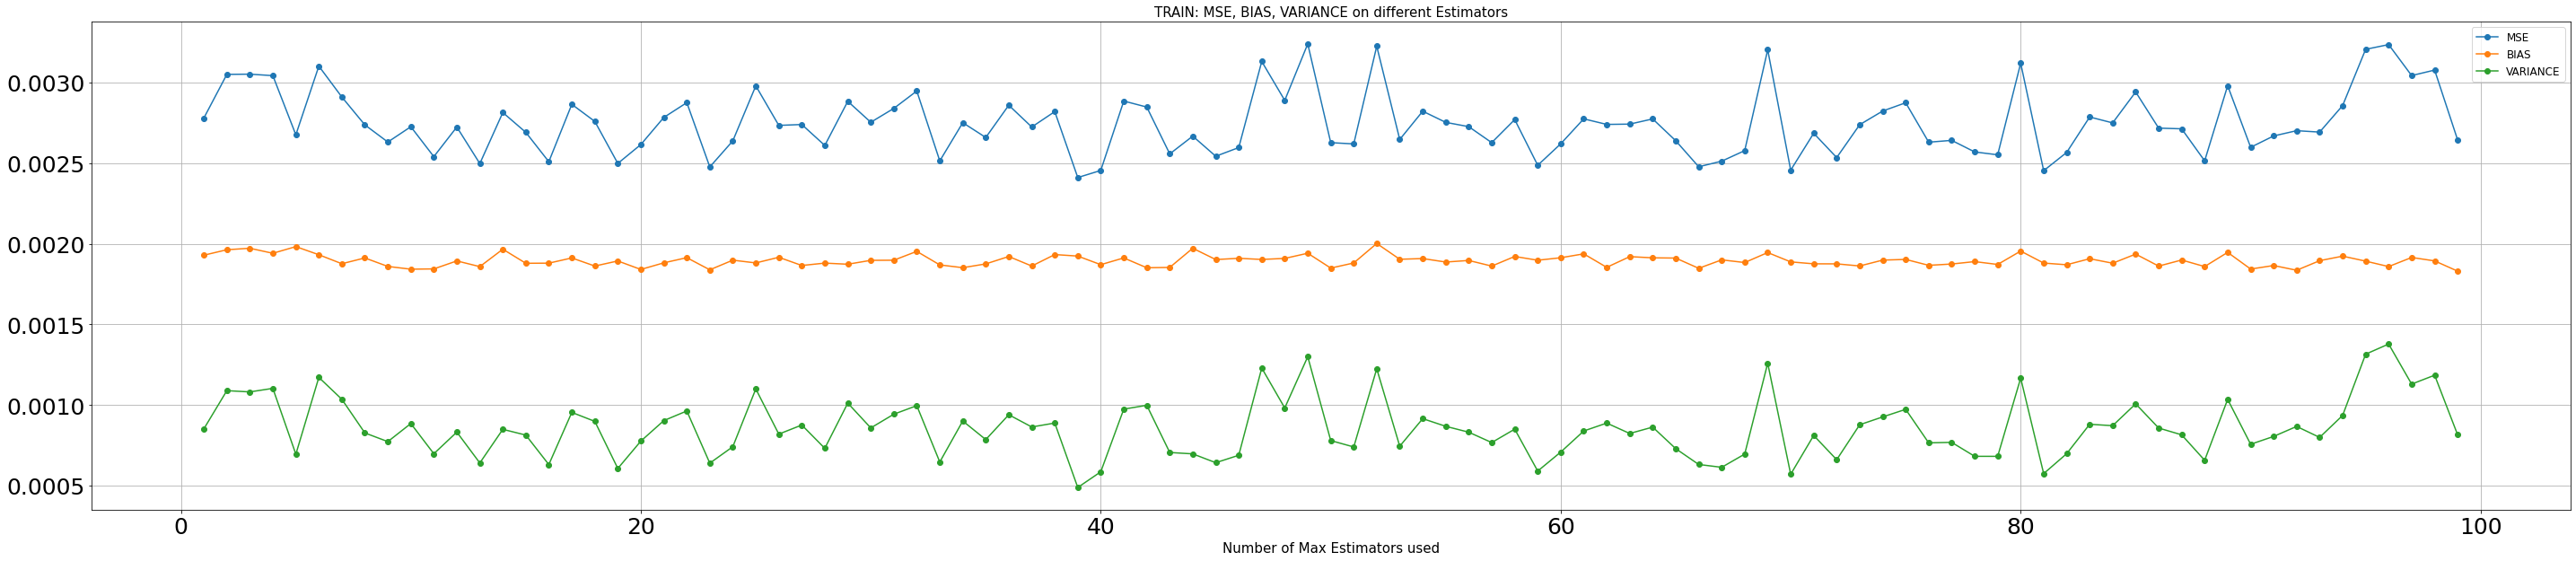

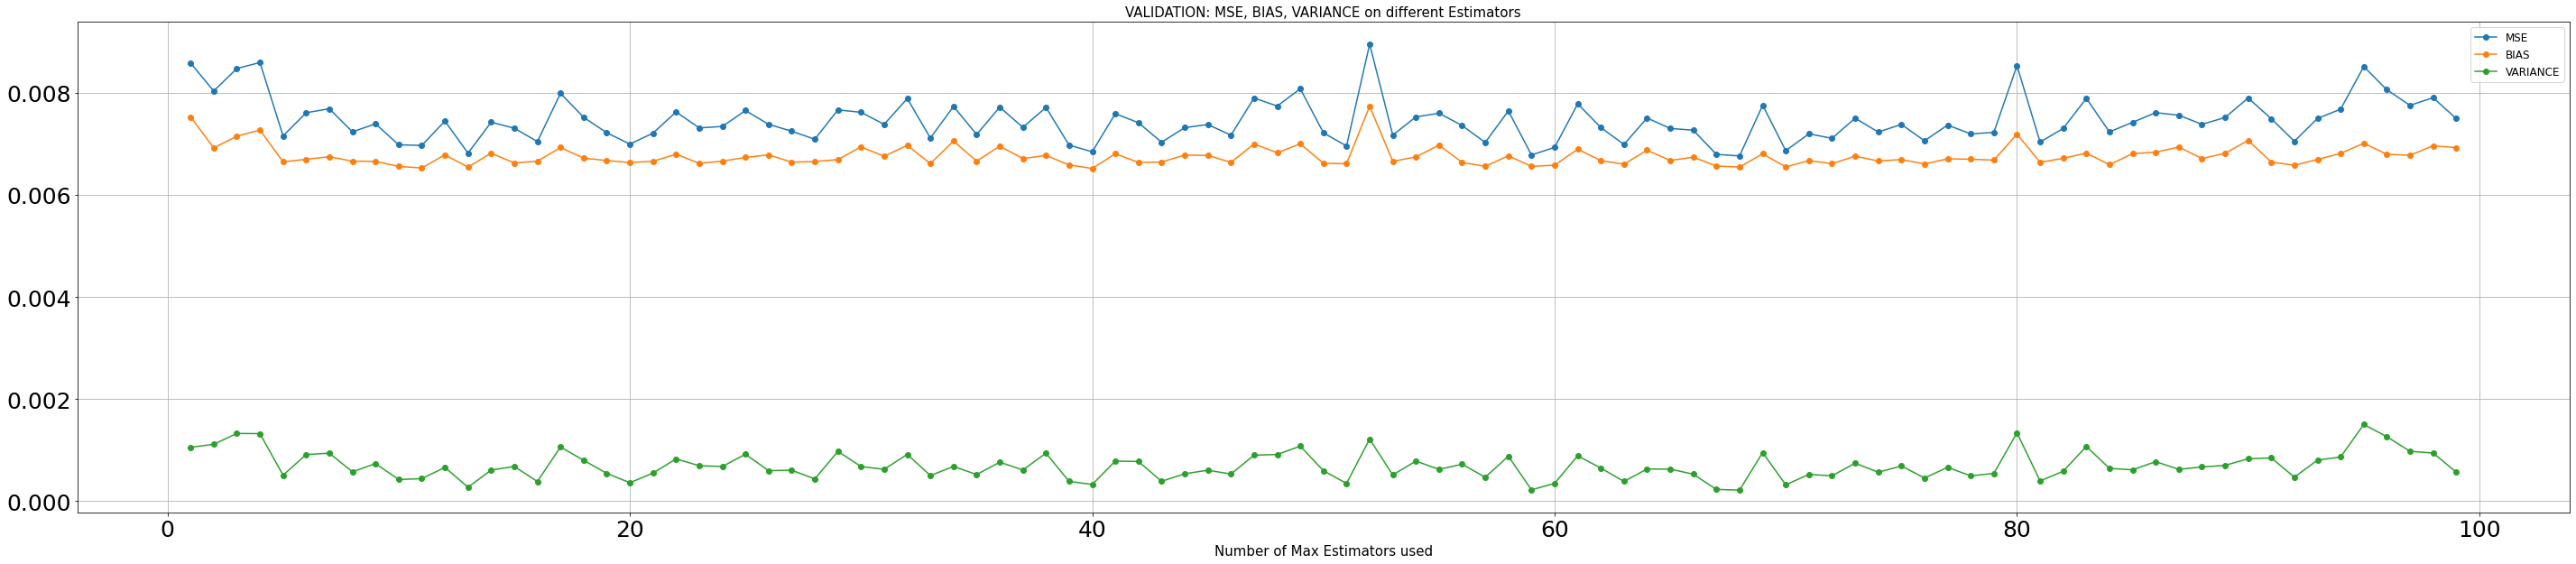

In [30]:
%%time
boost_model.append(
    get_bmodel(
        0,
        verbose   = False,
        debug     = False,
        file_name = 'A'
    )        
)

TUNING DEL NUMERO DI STIMATORI TRAIN

Punteggio finale: 0.015311698345789953 (100) stimatori
Best mse:, 0.014180459206229377
Best number of Estimators: 82

Punteggio finale: 0.010789928782103192 (100) stimatori
Best bias:, 0.01067728599143074
Best number of Estimators: 11

Punteggio finale: 0.004521769563686761 (100) stimatori
Best var:, 0.003399050612291558
Best number of Estimators: 82

TUNING DEL NUMERO DI STIMATORI VALIDATION

Punteggio finale: 0.004685332221319753 (100) stimatori
Best mse:, 0.004488604546928424
Best number of Estimators: 32

Punteggio finale: 0.004241861606393227 (100) stimatori
Best bias:, 0.004127602818143591
Best number of Estimators: 71

Punteggio finale: 0.00044347061492652415 (100) stimatori
Best var:, 0.00029212839881778886
Best number of Estimators: 43

CPU times: user 3min 3s, sys: 433 ms, total: 3min 3s
Wall time: 3min 4s


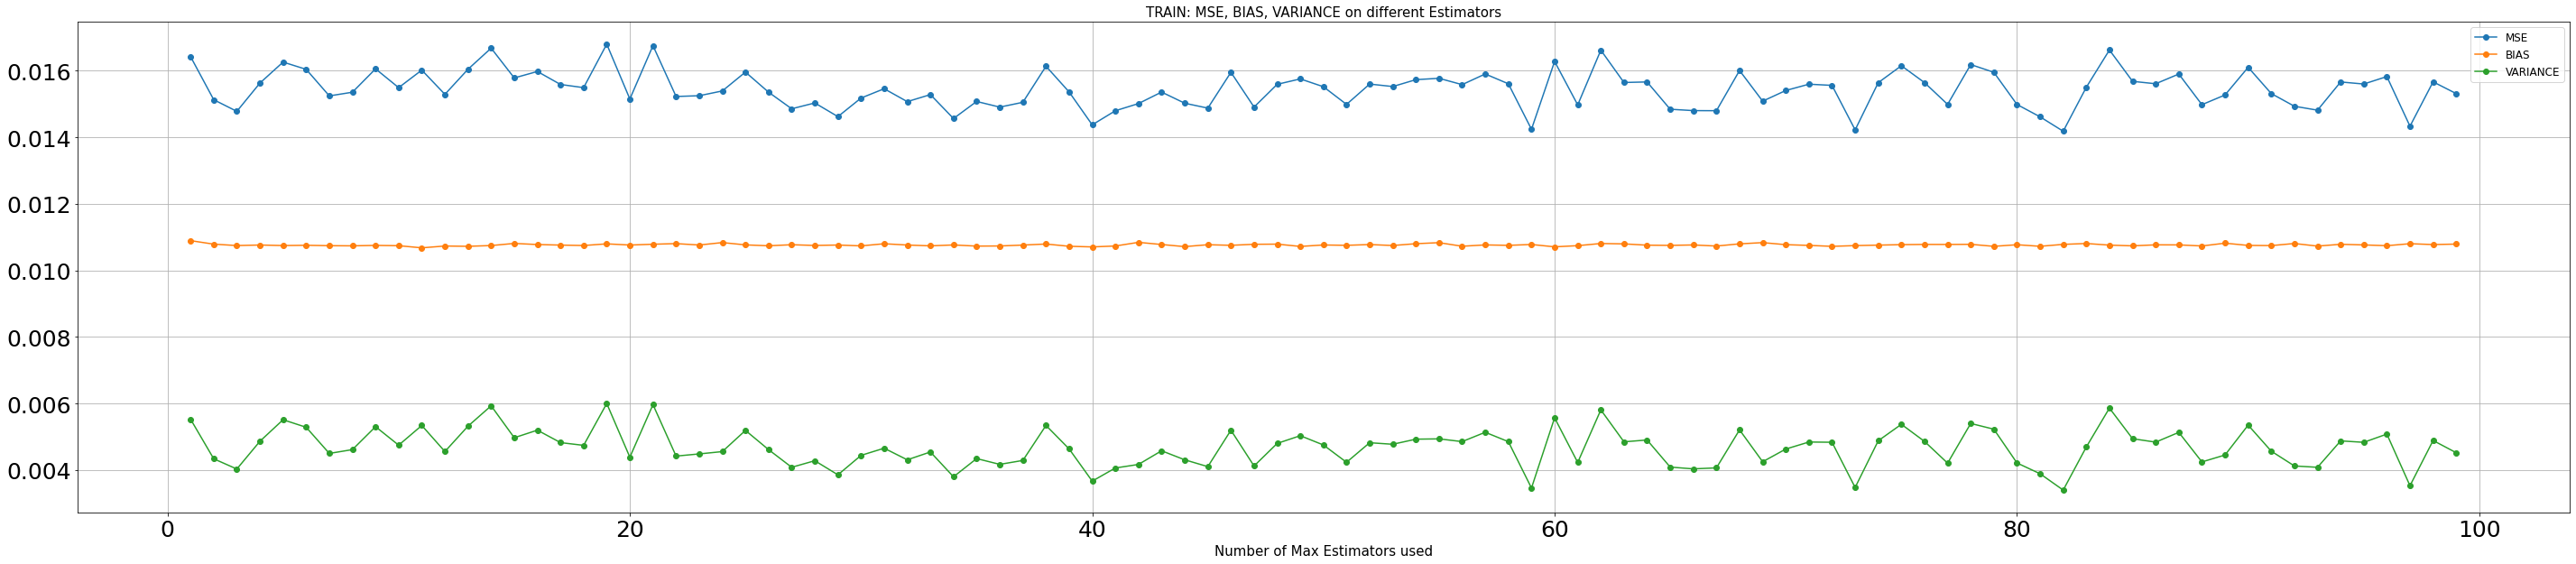

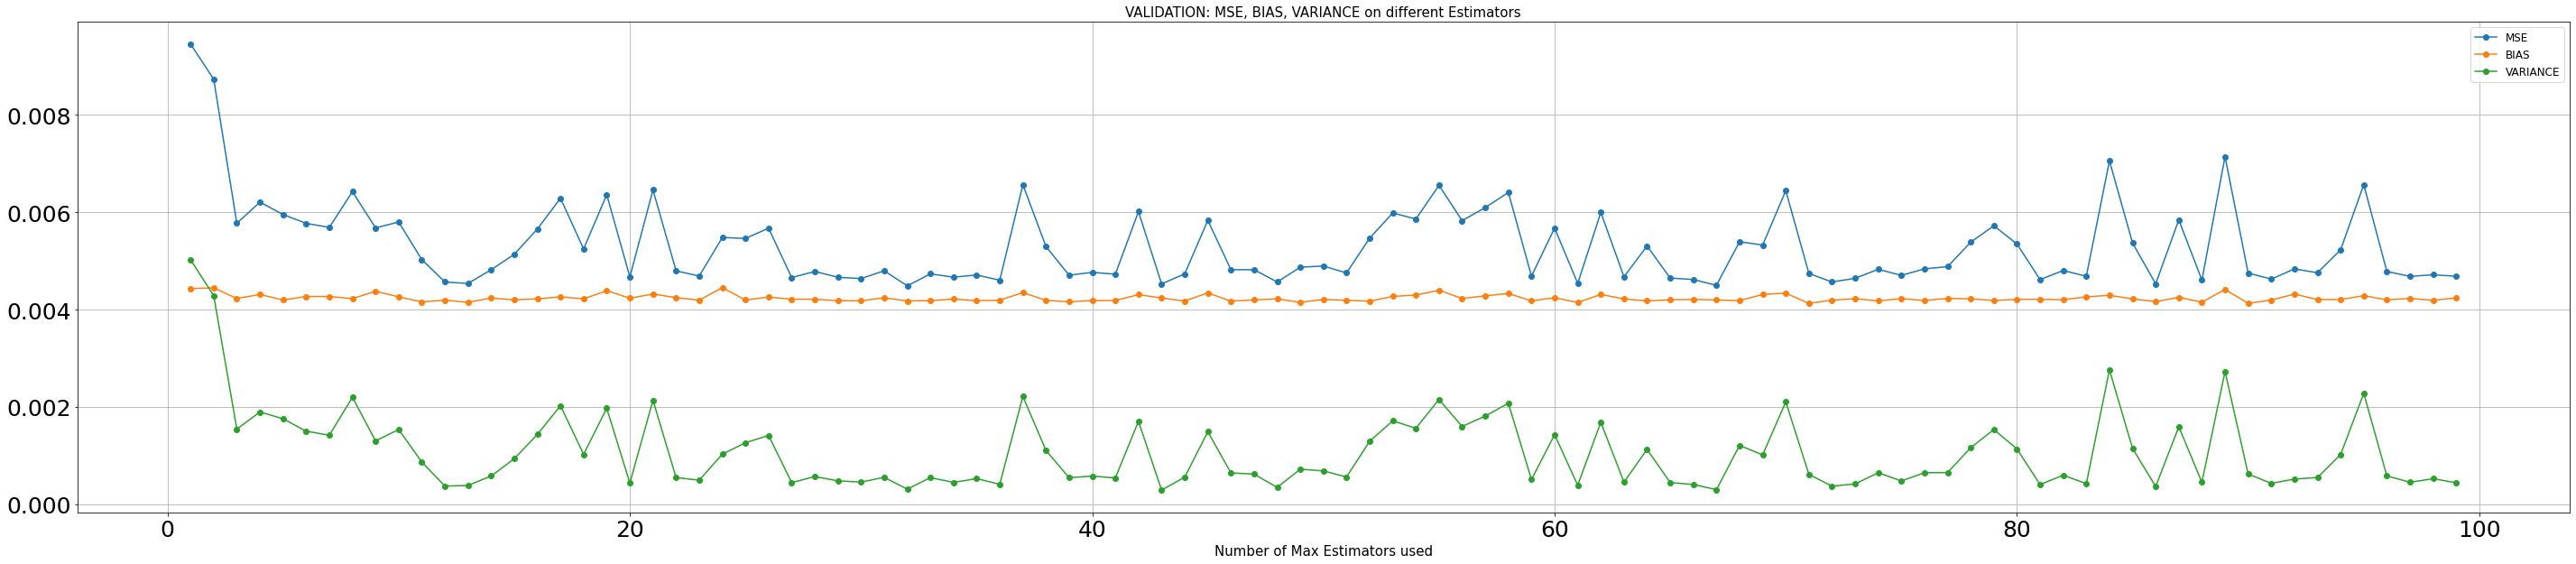

In [31]:
%%time
boost_model.append(
    get_bmodel(
        1,
        verbose   = False,
        debug     = False,
        file_name = 'B'
    )        
)

TUNING DEL NUMERO DI STIMATORI TRAIN

Punteggio finale: 0.0282045179235687 (100) stimatori
Best mse:, 0.0267390194632036
Best number of Estimators: 39

Punteggio finale: 0.017307299675819652 (100) stimatori
Best bias:, 0.017051763050289843
Best number of Estimators: 50

Punteggio finale: 0.010897218247749047 (100) stimatori
Best var:, 0.009114545592530955
Best number of Estimators: 39

TUNING DEL NUMERO DI STIMATORI VALIDATION

Punteggio finale: 0.024529832008955813 (100) stimatori
Best mse:, 0.020600799394270328
Best number of Estimators: 39

Punteggio finale: 0.02032190071598542 (100) stimatori
Best bias:, 0.017733644358659532
Best number of Estimators: 60

Punteggio finale: 0.004207931292970397 (100) stimatori
Best var:, 0.0022393802540005606
Best number of Estimators: 39

CPU times: user 4min 29s, sys: 544 ms, total: 4min 29s
Wall time: 4min 30s


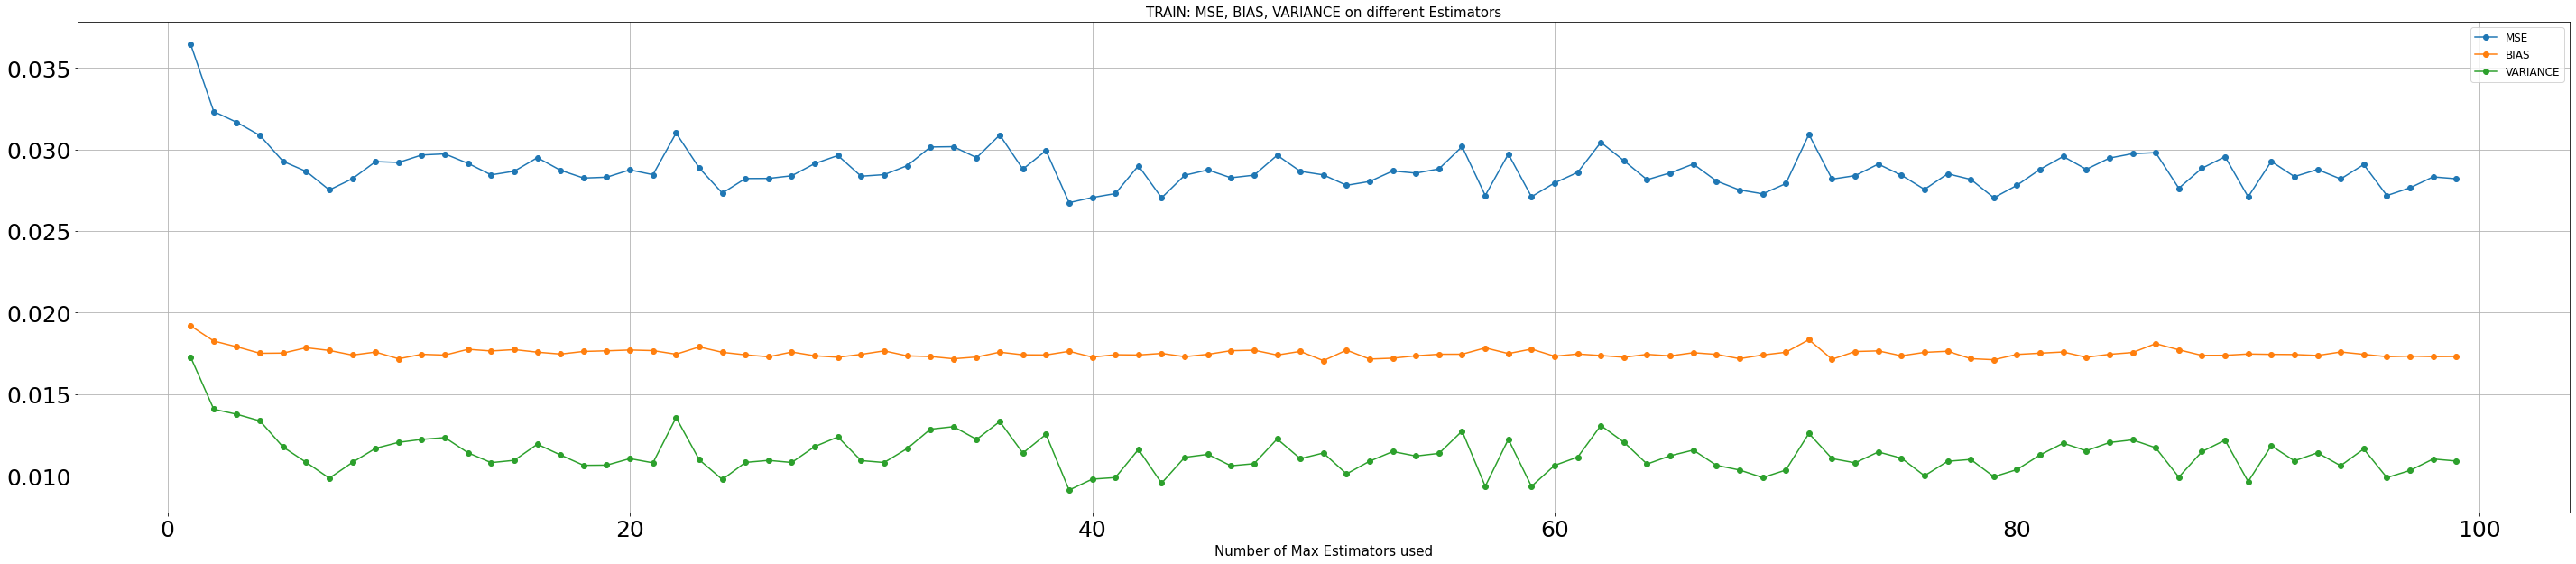

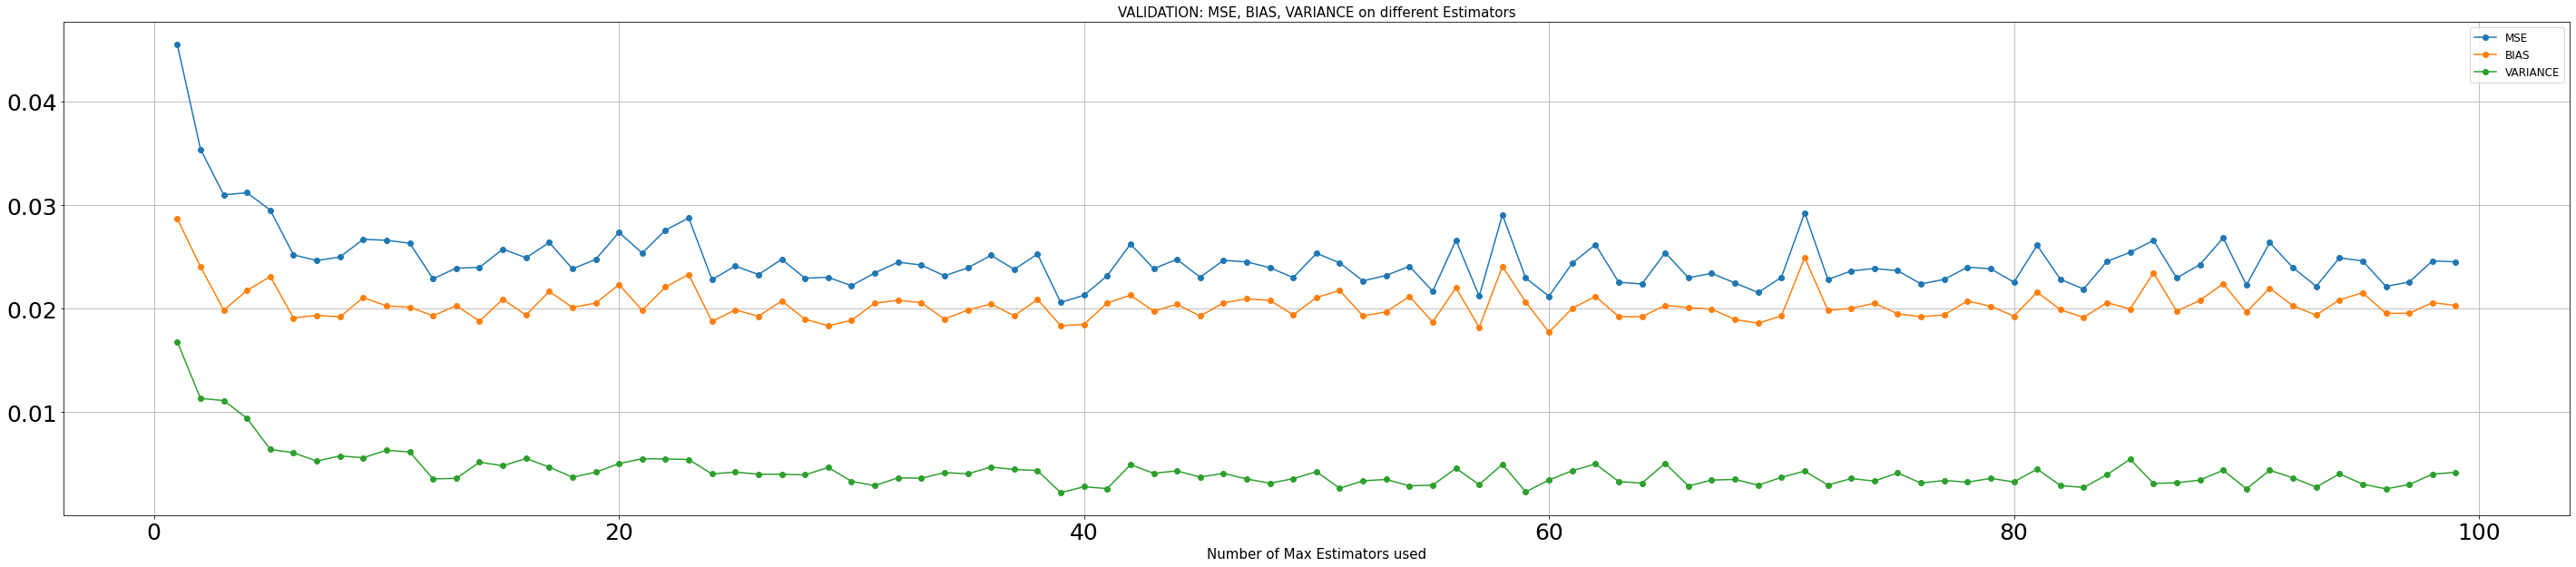

In [32]:
%%time
boost_model.append(
    get_bmodel(
        2,
        verbose   = False,
        debug     = False,
        file_name = 'C'
    )        
)

In [33]:
boost_model

[AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_leaf_nodes=2),
                   n_estimators=1),
 AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_leaf_nodes=3),
                   n_estimators=32),
 AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_leaf_nodes=26),
                   n_estimators=1)]

In [45]:
# Train
print_score(X_train, y_train, boost_model)

A: 0.007048875908959287

B: 0.0085437862878292

C: 0.012584332083081311



In [46]:
# Validation
print_score(X_val, y_val, dt_model)

A: 0.028828530550217026

B: 0.02558435909647721

C: 0.03463142383934715



In [47]:
# Test
print_score(X_test, y_test, dt_model)

A: 0.030470289163871227

B: 0.03079115356085899

C: 0.037532792964226354

